In [49]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
F = len("Patryk")
L = len("Tomaszewski")

## Excercise 1 -  Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_1.stan to exe file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_1
INFO:cmdstanpy:compiled model executable: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpedy6hv8k/tmpmoud0vpj.hpp /var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpedy6hv8k/tmpmoud0vpj.stan
Warning in '/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpedy6hv8k/tmpmoud0vpj.stan', line 7, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format fla

In [7]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [8]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,59.6161,56.0,58.0,63.0,68.0,60.0,63.0
1,0.0,0.0,174.5720,158.0,194.0,157.0,151.0,194.0,169.0
2,0.0,0.0,63.6020,54.0,75.0,71.0,63.0,76.0,70.0
3,0.0,0.0,119.3310,112.0,121.0,130.0,106.0,124.0,139.0
4,0.0,0.0,91.7523,97.0,96.0,101.0,87.0,100.0,95.0


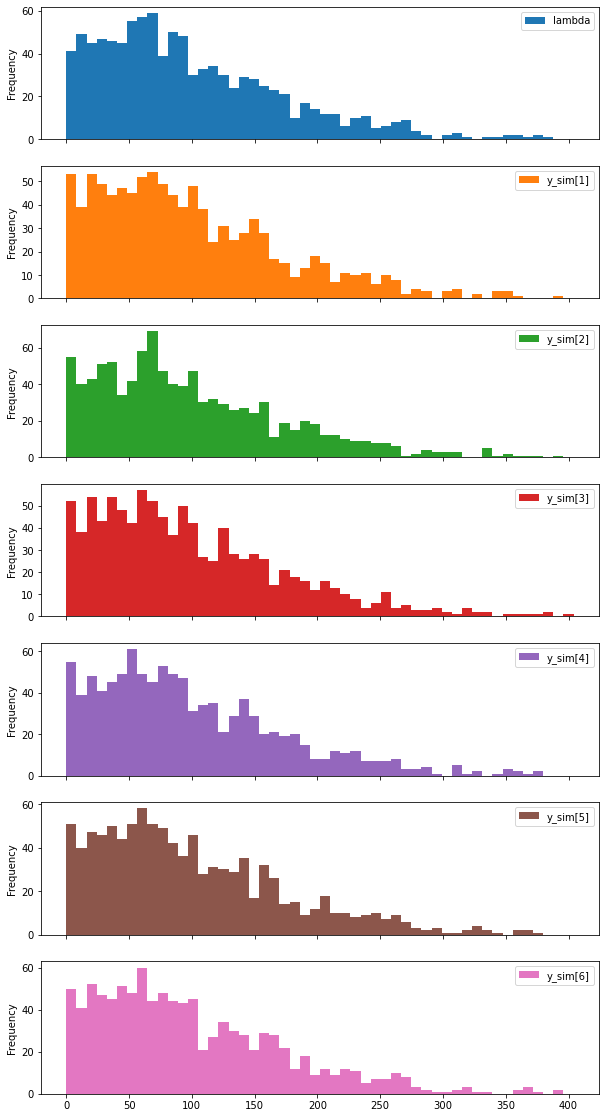

In [14]:
cols2plot = df.loc[:, 'lambda':'y_sim[6]']
cols2plot.plot.hist(subplots=True, bins=50, figsize=(10,20))
plt.show()

## Excercise 2 - Constraints on the data 

In [18]:
#  index error if 'y':[0,2] so I changed it to 1
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


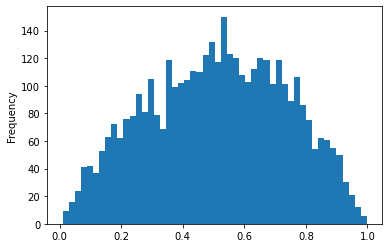

In [26]:
bern_1_df = samp_bern1.draws_pd()
bern_1_df['theta'].plot.hist(bins=50)
plt.show()

In [19]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


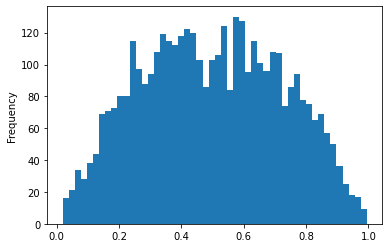

In [27]:
bern_2_df = samp_bern2.draws_pd()
bern_2_df['theta'].plot.hist(bins=50)
plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [28]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_4.stan to exe file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_4
INFO:cmdstanpy:compiled model executable: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_4
INFO:cmdstanpy:created output directory: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_4-20220308214555_1.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_4-20220308214555_2.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_4-20220308214555_3.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_4-20220308214555_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8671 of 24000 (36.13%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to

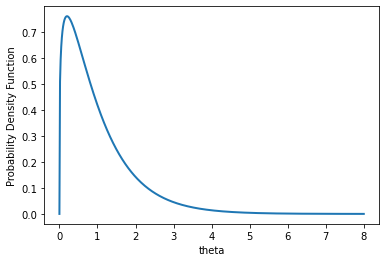

In [31]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


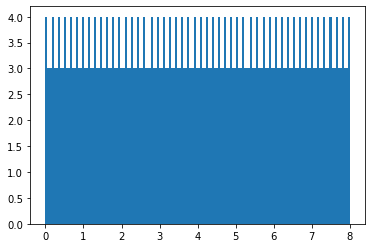

In [34]:
plt.hist(xs, bins=150)
plt.show()

### Constrained parameter

In [35]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_5-20220308214930_1.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_5-20220308214930_2.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_5-20220308214930_3.csv, /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/samples/code_5-20220308214930_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to rep

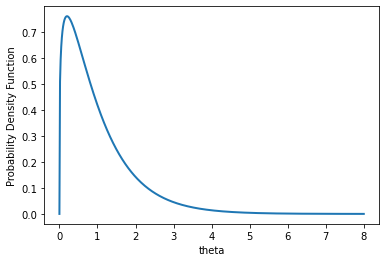

In [36]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

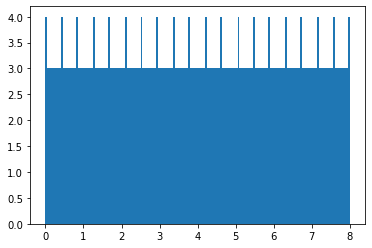

In [38]:
plt.hist(xs, bins=160)
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [39]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 2 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:compiling stan file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_6.stan to exe file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_6
INFO:cmdstanpy:compiled model executable: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmphgjdmsrl/tmp135u1or7.hpp /var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmphgjdmsrl/tmp135u1or7.stan
Warning in '/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmphgjdmsrl/tmp135u1or7.stan', line 3, column 45: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to sta

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [40]:
tunes.draws_pd()

,lp__,accept_stat__,sigma
0,0.0,0.0,3.29991


## Excercise 5 - different methods of defining models


In [53]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 30091999  #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


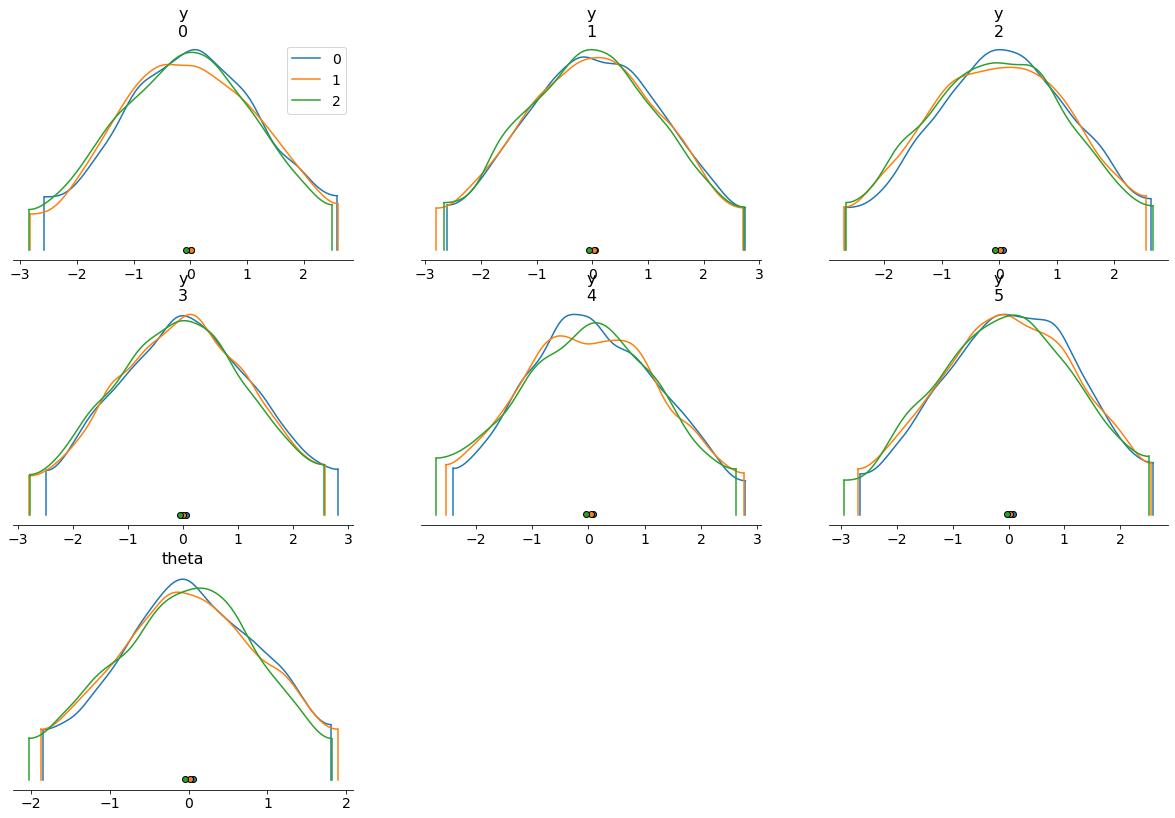

In [54]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [55]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

INFO:cmdstanpy:compiling stan file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_10.stan to exe file /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_10
INFO:cmdstanpy:compiled model executable: /Users/patryktomaszewski/studies/master deegre sem 1/data analitycs/Data-Analytics-labs/Lab 2 - Intro to stan/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpzw5xhef4/tmpstva0elx.hpp /var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpzw5xhef4/tmpstva0elx.stan
Warning in '/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmpzw5xhef4/tmpstva0elx.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format 

<AxesSubplot:ylabel='Frequency'>

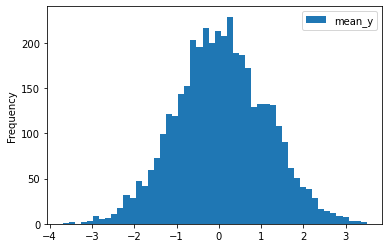

In [57]:
df.plot.hist(bins=50)